<h4>Multi Layer Perceptron</h4?>
<ul>
<li>2 Inputs</li>
<li>1 Layer of 2 neurons</li>
<li>1 output</li>
</ul> 

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from drawviz import draw_dot

In [4]:
from mycrograd.engine import Value
from mycrograd.nn import Neuron, Layer, MLP


In [5]:

x = [2.0, 3.0]
n = MLP(2, [2, 1])
myMLP=n(x)
myMLP

Value(data=0.07603334404791959, grad=0)

In [6]:
xs = [
  [2.0, 3.0],
  [4.0, -1.0],

]
ys = [1.0, -1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=0.07603334404791959, grad=0),
 Value(data=0.01068889840566768, grad=0)]

In [7]:

for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)
  

0 1.875206430671732
1 2.994078171143698
2 3.6184738673963572
3 2.113112089948637
4 2.040720352381509
5 2.014659326857344
6 2.0052773576686436
7 2.001899848760712
8 2.0006839455538565
9 2.0002462203993883
10 2.0000886393437796
11 2.0000319101637607
12 2.000011487658954
13 2.0000041355572233
14 2.0000014888006006
15 2.0000005359682165
16 2.0000001929485576
17 2.000000069461481
18 2.000000025006133
19 2.000000009002208


In [8]:
ypred

[Value(data=-6.709026722777697e-05, grad=-2.0001341805344555),
 Value(data=-6.709026722777697e-05, grad=1.9998658194655445)]

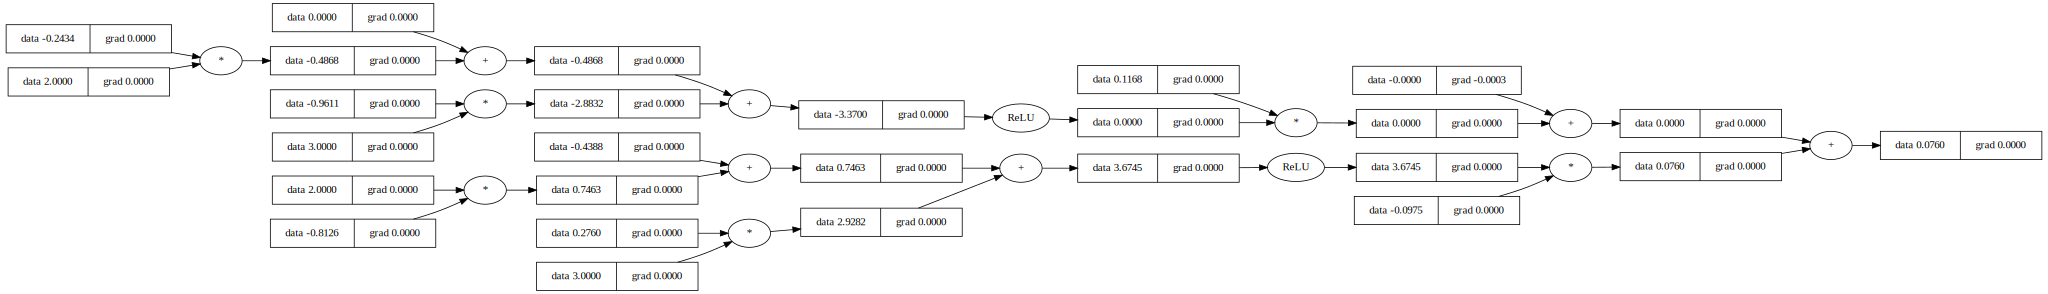

In [9]:
draw_dot(myMLP)

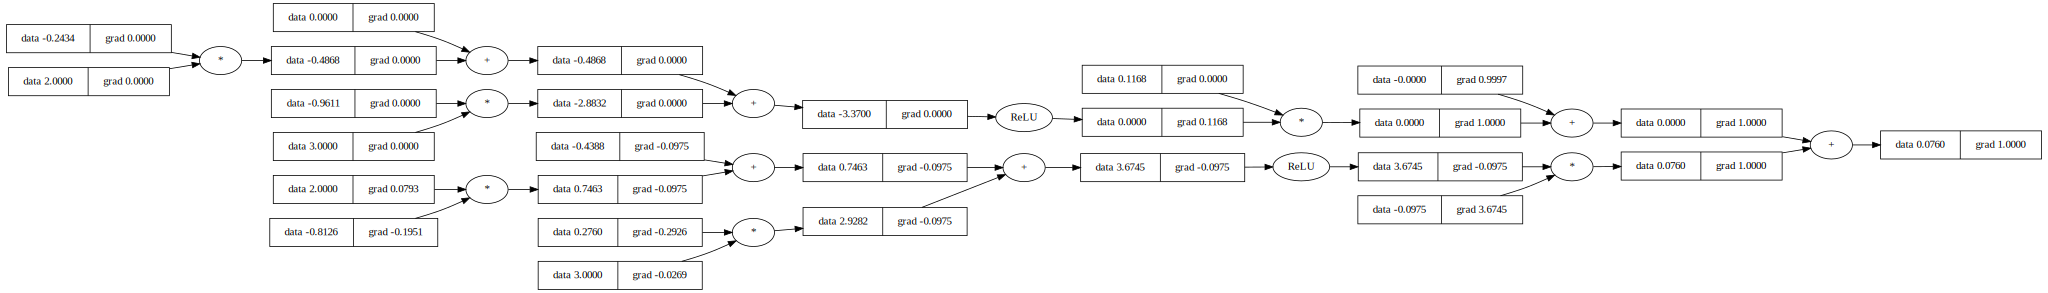

In [10]:
myMLP.backward()
draw_dot(myMLP)